In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('datasets/Credit_Card_Applications.csv')
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [10]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

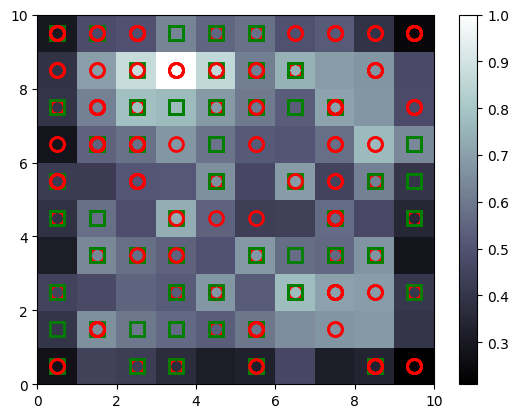

In [18]:
from pylab import pcolor, bone, colorbar, show, plot

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor= "None",
        markersize = 10,
        markeredgewidth = 2
    )

show()

In [20]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(5,
              1): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.75215934, 1.        , 0.32827068, 0.02678571, 0.5       ,
                     0.23076923, 0.375     , 0.05263158, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.1155    , 0.        ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
                     0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.98014648, 1.        , 0.30706767, 0.09821429, 0.5       ,
                     0.15384615, 0.5       , 0.0877193 , 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.116     , 0.002     ]), array([0.89100585, 1. 

In [22]:
frauds = np.concatenate((mappings[(3,8)], mappings[(2,8)], mappings[(4,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [24]:
frauds

array([[1.5662854e+07, 0.0000000e+00, 2.9580000e+01, 1.7500000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00],
       [1.5638983e+07, 0.0000000e+00, 5.6830000e+01, 4.2500000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 5.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 5.0000000e+00],
       [1.5654625e+07, 0.0000000e+00, 5.3330000e+01, 1.6500000e-01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 6.2000000e+01, 2.8000000e+01],
       [1.5623210e+07, 0.0000000e+00, 2.6580000e+01, 2.5400000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

In [25]:
customers = dataset.iloc[:,1:].values

In [26]:
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customers = sc.fit_transform(customers)

In [28]:
from keras import models, layers

classifier = models.Sequential()

In [ ]:
classifier.add(layers.Dense(units=2, kernel_initializer= 'uniform', activation='relu', input_dim = 15))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
classifier.add(layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [31]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
classifier.fit(customers, is_fraud, batch_size=1, epochs=5)

Epoch 1/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0602
Epoch 2/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9873 - loss: 0.0332
Epoch 3/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9857 - loss: 0.0411
Epoch 4/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9747 - loss: 0.0590
Epoch 5/5
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9875 - loss: 0.0330


In [50]:
y_pred = classifier.predict(customers)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [52]:
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]

In [53]:
y_pred

array([[1.57761560e+07, 1.55657140e+07, 1.04876226e-02],
       [1.57395480e+07, 1.55659960e+07, 3.00589926e-03],
       [1.56628540e+07, 1.55664950e+07, 1.72562736e-07],
       ...,
       [1.56754500e+07, 1.58150950e+07, 3.29714851e-07],
       [1.57764940e+07, 1.58152710e+07, 1.86849007e-04],
       [1.55924120e+07, 1.58154430e+07, 3.15735906e-06]])

In [49]:
df_y_pred = pd.DataFrame(y_pred)
df_y_pred

,0
0,9.847514e-17
1,9.875352e-13
2,4.924322e-12
3,4.151874e-10
4,1.784754e-08
...,...
2065,1.581510e+07
2066,1.581527e+07
2067,1.581527e+07
2068,1.581544e+07
